In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## CONFIDENCE INTERVALS

EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [2]:
n= 130
m= 98.25
std= 0.73
sem= std / np.sqrt(n) 
sem

0.06402523540941313

In [3]:
stats.t.interval(confidence=0.99, df=n-1, loc=m, scale=sem) 

(98.08260738705933, 98.41739261294067)

EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [5]:
n2= 500
m2= 5.4
std2= 3.1
sem2= std2/ np.sqrt(n2)
sem2

0.13863621460498696

In [6]:
stats.t.interval(confidence= 0.95, df= n2-1, loc= m2, scale= sem2)

(5.127617354510309, 5.672382645489692)

## HYPOTHESIS TESTING

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826


In [26]:
n3= 40 
m3= 13.2
std3= 2.5
pvalue= 0.005706018193000826
sem3= std3/ np.sqrt(n3)
sem

0.13863621460498696

In [27]:
stats.t.interval(confidence= 0.95, df= n3-1, loc= m3, scale= sem3)

(12.400461214549457, 13.999538785450541)

In [33]:
alpha = 0.01
if pvalue/2 < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.Yes this company can be accused of substandard wages'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.Yes this company can be accused of substandard wages


EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [34]:
df = pd.read_csv("soil - Sheet1.csv")
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [37]:
df.Soil1.fillna(df.Soil1.mean(), inplace=True)
df

,Soil1,Soil2
0,1.4420,1.364
1,1.9430,1.878
2,1.1100,1.337
3,1.9120,1.828
4,1.5530,1.371
5,1.6410,1.428
6,1.4990,1.119
7,1.3470,1.373
8,1.6850,1.589
9,1.5780,1.714


In [38]:
indTest1 = stats.ttest_ind(df.Soil1, df.Soil2)
indTest1

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [40]:
indTest2 = stats.ttest_ind(df.Soil1, df.Soil2, nan_policy="omit")
indTest2

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [41]:
if indTest1.pvalue < alpha:
    print("Reject the Null, soil samples differ depending on the average shear strength")
else:
    print("Fail to reject")
    
if indTest2.pvalue < alpha:
    print("Reject the Null, soil samples differ depending on the average shear strength")
else:
    print("Fail to reject")

Reject the Null, soil samples differ depending on the average shear strength
Reject the Null, soil samples differ depending on the average shear strength


EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [14]:
df2 = pd.read_csv("2015 PISA Test - Sheet1.csv")
df2

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [42]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [43]:
df_eu= df2.loc[(df2["Continent_Code"] == "EU") | (df2["Continent_Code"] == "AS")]

df_eu

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
14,CYP,EU,71.715900,437.1443,442.8443,432.5964
15,CZE,EU,75.668839,492.3254,487.2501,492.8300
16,DEU,EU,87.589800,505.9713,509.1041,509.1406


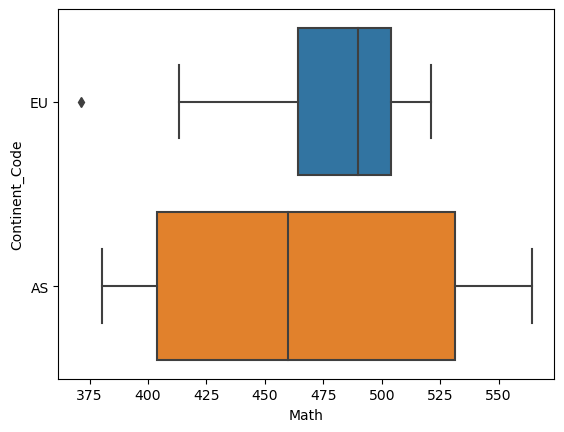

In [46]:
sns.boxplot(x= df_eu.Math, y= df_eu.Continent_Code);

In [47]:
df_eu.groupby("Continent_Code")["Math"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AS,17.0,466.216647,64.356490,380.2590,403.8332,459.8160,531.2961,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.0401,489.7287,503.7220,521.2506


In [50]:
indTest5 = stats.ttest_ind(df_eu[df_eu["Continent_Code"]=="EU"]["Math"], 
                           df_eu[df_eu["Continent_Code"]=="AS"]["Math"],equal_var = True)
indTest5

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [51]:
alpha = 0.05

if indTest5.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null
